# RL Grid Navigation

The goal of this assignment is to train an agent to navigate efficiently within a grid.
This means the agent should avoid the fields where bombs are placed and find the shortest path
from its starting position to the end position.

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display

from grid_env import GridEnv

## Creating the environment

In [2]:
env = GridEnv(num_bombs=5)

# Show action space, observation space and reward range
print(f'Action space: {env.action_space}')
print(f'Observation space: {env.observation_space}')
print(f'Reward range: {env.reward_range}')

Action space: Discrete(4)
Observation space: Tuple(Discrete(8), Discrete(8))
Reward range: (-100, 100)


Starting position: (0, 0)
Sample action: 2
Sample observation: (5, 0)


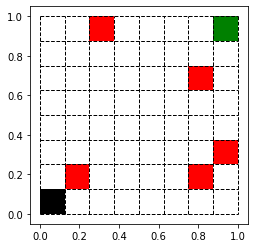

In [3]:
# Reset environment and print starting position
print(f'Starting position: {env.reset()}')

# Render the environment
env.render("image")

# Sample a random action and a random observation
print(f'Sample action: {env.action_space.sample()}')
print(f'Sample observation: {env.observation_space.sample()}')

Action: down, observation: (0, 0), reward: -1, done: False.


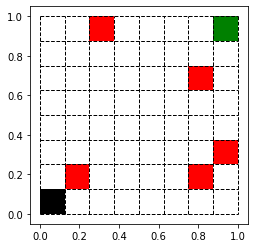

Action: down, observation: (0, 0), reward: -1, done: False.


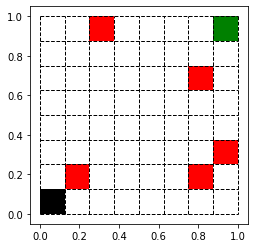

Action: right, observation: (1, 0), reward: -1, done: False.


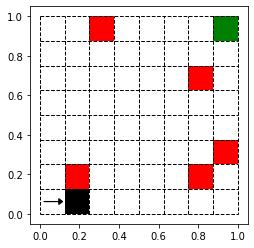

In [4]:
# Perform a few steps with random actions
env.reset()
num_steps = 3
for step in range(num_steps):
    action = env.action_space.sample()
    observation, reward, done, _ = env.step(action)
    print(f'Action: {env.get_action_name(action)}, observation: {observation}, reward: {reward}, done: {done}.')
    env.render("image")
    plt.show()


## Helper methods

In [5]:
def get_model(env):
    # Q table is dict of dict
    Q = {}
    for i in range(env.width):
        for j in range(env.height):
            Q[(i, j)] = {}
            for a in env.action_names:
                Q[(i, j)][a] = 0
    return Q


def get_action(env, model, state, epsilon):
    random_tradeoff = random.uniform(0, 1)

    # exploit
    if random_tradeoff > epsilon:
        action_dict = model.get(state)
        action_name = max(action_dict, key=action_dict.get)

        # get index number of action
        return env.get_action_index(action_name)

    # explore
    else:
        return env.action_space.sample()


def update_model_sarsa(env, model, state, next_state, reward, action, next_action, alpha, gamma):
    pass


def update_model_qlearning(env, model, state, next_state, reward, action, alpha, gamma):
    pass


def get_epsilon(episode, min_epsilon=0.01, max_epsilon=1, decay=0.01):
    return min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)

## SARSA

### Training the agent

In [6]:
def train_sarsa(env, episodes=1000):
    # variables
    total_timesteps = 0
    scores = []
    gamma = 0.7  # discount factor
    alpha = 0.5  # learning rate

    model = get_model(env)

    # TODO: remove this return statement
    return model, scores

    for episode in range(episodes):
        # start episode and get initial observation
        state = env.reset()
        epsilon = get_epsilon(episode)

        # reset score and epochs
        score = 0
        epochs = 0

        # get first action
        action = get_action(env, model, state, epsilon)

        done = False

        # loop through steps
        while not done:
            # TODO implement SARSA

            # update score
            score += reward

            epochs += 1

        print(f'Episode {episode} finished, Score: {score}, Epochs: {epochs}, '
              f'Epsilon: {epsilon:.2f}')

        total_timesteps += epochs
        scores.append(score)

    # close the environment
    env.close()

    return model, scores

In [7]:
env = GridEnv()
episodes = 500
model, scores = train_sarsa(env, episodes)

In [8]:
def visualize_training_development(episodes, scores):
    x = range(episodes)
    plt.plot(x, scores)
    plt.xlabel("Episode")
    plt.ylabel("Training scores")
    plt.title("Score development over all episodes")
    plt.show()


# Visualize Q-Table
df = pd.DataFrame(model)
display(df)

# Visualize training development
#visualize_training_development(episodes, scores)

0                       1     ...  6     7                     
       0  1  2  3  4  5  6  7  0  1  ...  6  7  0  1  2  3  4  5  6  7
down   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
right  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
up     0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
left   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[4 rows x 64 columns]

## Visualization of the q-values
In the following grid the learned policy is plotted. Each arrow indicates the action with the highest q-value.

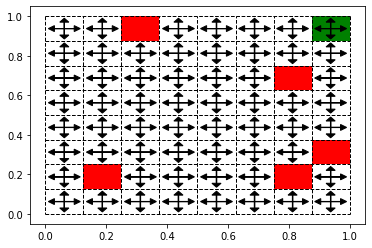

In [9]:
from rendering import *


def visualize_q_values(model):
    places = list(model.keys())
    renderer = ImageRenderer(env.width, env.height)
    renderer.plot_grid()
    renderer.plot_rect(env.end_pos, "green")

    for bomb_pos in env.bomb_positions:
        renderer.plot_rect(bomb_pos, "red")

    for p in places:
        if p in env.bomb_positions:
            continue

        left_q = model[p]["left"]
        right_q = model[p]["right"]
        up_q = model[p]["up"]
        down_q = model[p]["down"]

        if left_q == max(left_q, right_q, up_q, down_q):
            renderer.plot_left(p)

        if right_q == max(left_q, right_q, up_q, down_q):
            renderer.plot_right(p)

        if up_q == max(left_q, right_q, up_q, down_q):
            renderer.plot_up(p)

        if down_q == max(left_q, right_q, up_q, down_q):
            renderer.plot_down(p)


visualize_q_values(model)

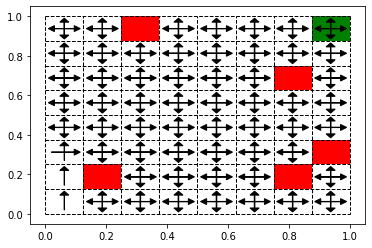

In [10]:
# Example visualization
example_model = get_model(env)
example_model[(0,0)]['up'] = 1
example_model[(0,1)]['up'] = 1
example_model[(0,2)]['up'] = 1
example_model[(0,2)]['right'] = 1

visualize_q_values(example_model)

### Testing the agent

In [11]:
def test_agent(env, model):
    # TODO remove this return statement
    return 0

    state = env.reset()
    done = False
    num_steps = 0
    while not done:
        env.render("image")
        action = get_action(env, model, state, 0)
        print(f'Action: {env.get_action_name(action)}')
        state, reward, done, info = env.step(action)
        num_steps += 1

    print(f'Finished in {num_steps} steps.')
    env.render("image")
    return num_steps


def evaluate_agent(env, num_steps_agent):
    num_steps_optimum = env.get_minimum_number_of_steps()
    print(f'Minimum number steps required: {num_steps_optimum}')
    print(f'Number steps test agent: {num_steps_agent}')

    if num_steps_agent == num_steps_optimum:
        print(f'SUCCESS! Optimal strategy found by agent.')
    else:
        print(f'FAILURE! Suboptimal strategy found by agent. '
              f'Difference to optimal strategy: {num_steps_agent - num_steps_optimum} steps.')

In [12]:
num_steps = test_agent(env, model)
evaluate_agent(env, num_steps)

Minimum number steps required: 14
Number steps test agent: 0
FAILURE! Suboptimal strategy found by agent. Difference to optimal strategy: -14 steps.


## Q-Learning

### Training the agent

In [13]:
def train_qlearning(env, episodes=1000):
    # variables
    total_timesteps = 0
    scores = []
    gamma = 0.7
    alpha = 0.5

    model = get_model(env)

    # TODO: remove this return statement
    return model, scores

    for episode in range(episodes):
        # start episode and get initial observation
        state = env.reset()
        epsilon = get_epsilon(episode)

        # reset score and epochs
        score = 0
        epochs = 0

        done = False

        # loop through steps
        while not done:
            # TODO: implement Q-learning

            # update score
            score += reward

            # update epoch
            epochs += 1

        print(f'Episode {episode} finished, Score: {score}, Epochs: {epochs}, '
              f'Epsilon: {epsilon:.2f}')

        total_timesteps += epochs
        scores.append(score)

    # close the environment
    env.close()

    return model, scores

In [14]:
env = GridEnv()
episodes = 500
model, scores = train_qlearning(env, episodes)

In [15]:
def train_qlearning(env, episodes=1000):
    # variables
    total_timesteps = 0
    scores = []
    gamma = 0.7
    alpha = 0.5

    model = get_model(env)

    # TODO: remove this return statement
    return model, scores

    for episode in range(episodes):
        # start episode and get initial observation
        state = env.reset()
        epsilon = get_epsilon(episode)

        # reset score and epochs
        score = 0
        epochs = 0

        done = False

        # loop through steps
        while not done:
            # TODO: implement Q-learning

            # update score
            score += reward

            # update epoch
            epochs += 1

        print(f'Episode {episode} finished, Score: {score}, Epochs: {epochs}, '
              f'Epsilon: {epsilon:.2f}')

        total_timesteps += epochs
        scores.append(score)

    # close the environment
    env.close()

    return model, scores

In [16]:
env = GridEnv()
episodes = 500
model, scores = train_qlearning(env, episodes)

In [17]:
df = pd.DataFrame(model)
display(df)

#visualize_training_development(episodes, scores)

0                       1     ...  6     7                     
       0  1  2  3  4  5  6  7  0  1  ...  6  7  0  1  2  3  4  5  6  7
down   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
right  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
up     0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
left   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[4 rows x 64 columns]

### Testing the agent

In [18]:
num_steps_agent = test_agent(env, model)
evaluate_agent(env, num_steps_agent)



Minimum number steps required: 14
Number steps test agent: 0
FAILURE! Suboptimal strategy found by agent. Difference to optimal strategy: -14 steps.
